# <span style="color:blue">Programming for Data Science - DS-GA 1007</span>
## <span style="color:blue">Assignment 8: Pandas - Part III</span>
---

This assignment will require the database of restaurant grades that can be downloaded from:

https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

__Question 1.__ (1.5 points) Import the dataset into a pandas DataFrame. You will need to clean up the data, for example, by removing all entries that have invalid grades (in the ‘GRADE’ column). Print the number of rows that was removed by the cleaning process.

In [1]:
# Solution
import pandas as pd
df=pd.read_csv('/Users/yuqidai/Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
n_orig=df.shape[0]
df.dropna(inplace=True)
n_clean=df.shape[0]
df['id']=df.index
print('Number of Rows Before Cleaning:',n_orig)
print('Number of Rows After Cleaning:',n_clean)
print('Number of Removed Rows :',n_orig-n_clean)

Number of Rows Before Cleaning: 381645
Number of Rows After Cleaning: 185385
Number of Removed Rows : 196260


__Question 2.__ (3.0 points) Write a function called <font color=blue>Group_Years</font> which receives the cleaned dataframe as a parameter and returns an object with restaurantes grouped by years according to the column 'GRADE DATE'. Print the names of the groups (which correspond to the years).<br><br>
__Hint:__ Use the <font color=blue>dateutil</font> package to parser the column 'GRADE DATE' as a date type and the method <font color=blue>dt</font> available in the DataFrame class to get the year.

In [2]:
# Solution
import dateutil
def Group_Years(restaurants):
    year=[]
    for i in df.index:
        year.append(dateutil.parser.parse(restaurants['GRADE DATE'][i]).year)
    restaurants['Year']=year
    df1=restaurants["DBA"].groupby(restaurants['Year'])
    
    return df1


In [3]:
for i,j in Group_Years(df):
    print (i)

2012
2013
2014
2015
2016
2017
2018


__Question 3.__ (3.0 points) Write a function called <font color=blue>Restaurant_Grades</font> which receives _year_ as one of the parameters and returns the number of restaurants graded as 'A', 'B', and 'C' in that particular year. Print out the number of restaurants in each grade for all years in the dataset. Format your print as below:
```
2014
A :  23005
B :  5171
C :  1380
2015
A :  43943
B :  8803
C :  1983
.
.
.
```


In [4]:
group_by_year = df.groupby(df['Year'])
years = [2012,2013,2014,2015,2016,2017,2018]
def Grade(group_by_year,year):
    grade_list = list(group_by_year.get_group(year)['GRADE'])
    print( str(year) + '\n' + 'A :  ' + str(grade_list.count('A')) + '\n' + 'B :  ' + str(grade_list.count('B')) + '\n' + 'C :  ' + str(grade_list.count('C')))

In [5]:
for i in years:
    Grade(group_by_year,i)

2012
A :  2
B :  0
C :  0
2013
A :  2
B :  0
C :  0
2014
A :  389
B :  42
C :  11
2015
A :  19261
B :  3408
C :  829
2016
A :  39429
B :  6413
C :  1609
2017
A :  40281
B :  6264
C :  1904
2018
A :  49020
B :  7974
C :  2846


__Question 4.__ (2.5 points) Generate the following plots:
1. NYC: bar plot comparing the grades, over the years, for all the instances in the dataset.
2. Brooklyn: bar plot comparing the grades of Brooklyn's restaurants over the years.
3. Manhattan: bar plot comparing the grades of Manhattan's restaurants over time.<br>

The plots should look like (download _assignment8-plots.png_ from NYU Classes):
<img src="assignment8-plots.png" width="800" height="500" />

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]),
 <a list of 9 Text xticklabel objects>)

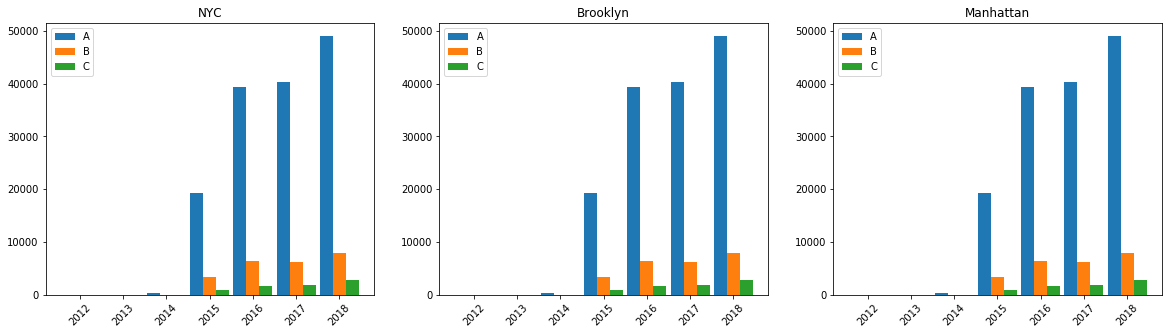

In [6]:
# Solution 
import matplotlib.pyplot as plt
%matplotlib inline

# Solution 
import matplotlib.pyplot as plt
%matplotlib inline

def newlist(df, g, NYC = False, Manhattan = False,Brooklyn = False):
    result = []
    if Brooklyn == True:
        data = df[df['BORO'] == 'BROOKLYN']
    elif Manhattan == True:
        data = df[df['BORO'] == 'MANHATTAN']
    else:
        data = df
    g_year = data.groupby(data['Year'])
    for i in years:
        if i not in list(g_year.groups.keys()):
            result.append(0)
        else:
            grade_list = list(group_by_year.get_group(i)['GRADE'])
            result.append(grade_list.count(g))
    return result
barwidth=0.3
plt.figure(figsize = (20,5))
plt.subplot(131)
for i,j in enumerate(['A','B','C']):
    rate1 = newlist(df, j,NYC=True)
    plt.bar([a + barwidth*(i-1) for a in years ], rate1, width = 0.3, label = j)
plt.legend()
plt.title('NYC')
plt.xticks(rotation=45)

plt.subplot(132)
for i,j in enumerate(['A','B','C']):
    rate2 = newlist(df, j, Brooklyn = True)
    plt.bar([a + barwidth*(i-1) for a in years ], rate2, width = 0.3, label = j)
plt.legend()
plt.title('Brooklyn')
plt.xticks(rotation=45)

plt.subplot(133)
for i,j in enumerate(['A','B','C']):
    rate3 = newlist(df, j, Manhattan = True)
    plt.bar([a + barwidth*(i-1) for a in years ], rate3, width = 0.3, label = j)
plt.legend()
plt.title('Manhattan')
plt.xticks(rotation=45)

Based on the plots, can you claim that the quality of the restaurants are improving over years?

__Answer__: Actually not, because the amounts of B and C grade resturant are increasing as well so we cannot draw such conclusion without checking the actual ratio of type A and type C or B resturants.